In [1]:
#Scikit learn is a python library that is used to train model , preprocessing 
# it is called as father of machine learning


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

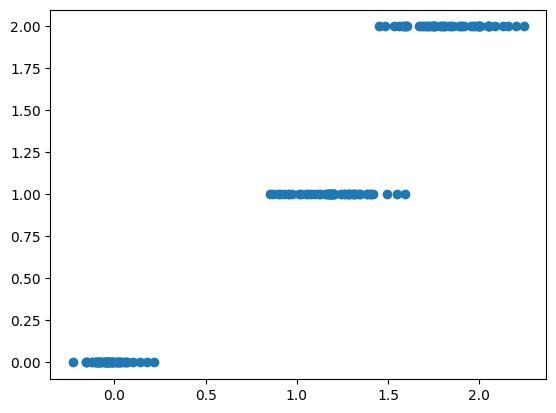

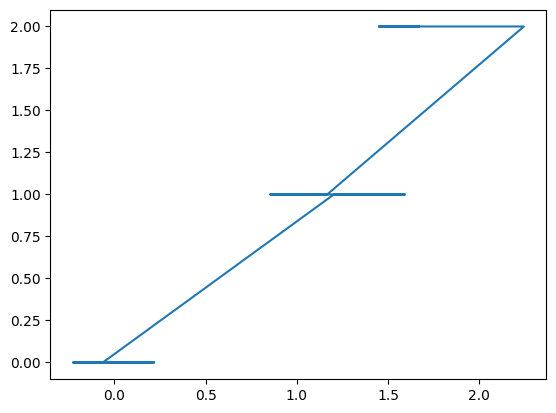

[-0. -0. -0.  0. -0.  0.  0. -0.  0. -0.]
[0 0 0 0 0 0 0 0 0 0]
Accuracy is 97.0 %


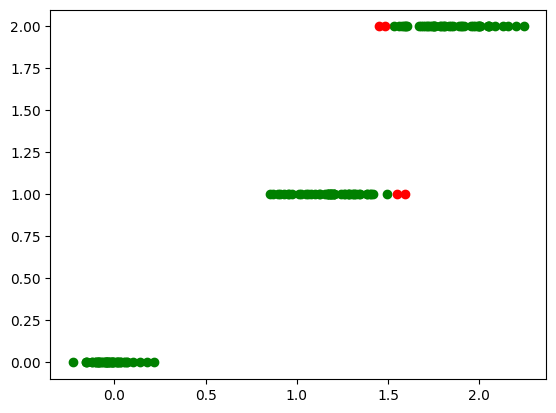

In [3]:
import sklearn
from sklearn.datasets import load_iris
from IPython.display import display
load_iris()
# to see the input and output variable separetly
load_iris(return_X_y=True)

# lets understand with a sample model
x,y=load_iris(return_X_y=True)
from sklearn.linear_model import LinearRegression
Model=LinearRegression()
# this is the phase where the model is not learning anything
# untill we provide it a data set
Model =Model.fit(x,y)
Model.predict(x)

# checking the predicted data with output variable
# assigning the predicted value
pred=Model.predict(x)
plt.scatter(pred,y) # predicted value as pred and output as y
plt.show()
plt.plot(pred,y)
plt.show()

# Diving deep into this 
rounded_pred=np.round(pred) # it will round the float value to integer

# By Value Identification
print(rounded_pred[:10])
print(y[:10])
# Calculate Accuracy
accuracy=(np.mean(rounded_pred==y))*100
print(f"Accuracy is {np.round(accuracy)} %")
# Visually identification
correct=rounded_pred==y
plt.scatter(pred[correct],y[correct],color="g",label="Correct prediction")
plt.scatter(pred[~correct],y[~correct],color="r",label="False prediction")